# Assignment II: Clustering

Essential libraries for data analysis, preprocessing, machine learning, and visualization are first imported. Data handling and manipulation are performed using the pandas library, while numerical operations, particularly involving arrays and matrices, are facilitated by numpy. To prepare data for clustering, features are standardized using StandardScaler from sklearn.preprocessing, ensuring a similar scale, which is essential for distance-based algorithms.

For clustering, three algorithms are utilized: KMeans and AgglomerativeClustering from sklearn.cluster for partition-based and hierarchical clustering, respectively, and GaussianMixture from sklearn.mixture, which applies probabilistic clustering using Gaussian distributions. Clustering performance is assessed with silhouette_score from sklearn.metrics, a metric that evaluates how well each object fits within its assigned cluster.

Finally, matplotlib.pyplot is used to create basic plots, while seaborn enables advanced statistical visualizations, improving aesthetics and providing enhanced functionality for exploratory data analysis.

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In this step, the dataset is loaded using the pd.read_csv() function from the pandas library. This function is used to read a CSV file and load it into a DataFrame, which serves as the primary data structure in pandas for handling tabular data. After the data is loaded, data.head() is called to display the first few rows, allowing a preview of the dataset structure and verification of successful loading.

In [40]:
# 1. Load Data
# Load the dataset
data = pd.read_csv('E:/desktop/Customer_Data.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


 It's crucial to ensure that the analysis only includes numerical columns because we are getting the data ready for clustering. Distance-based computations necessitate numerical inputs, and clustering algorithms like K-means operate on the distances between data points. To prevent mistakes and ensure that the model only utilizes pertinent features, we eliminate non-numeric entries like CUST_ID.

# Data Preprocessing

In [41]:
# 2. Data Preprocessing
# Drop the 'CUST_ID' column as it is only a unique identifier and irrelevant for clustering
data = data.drop(columns=['CUST_ID'])

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Fill missing values
data.fillna(data.mean(), inplace=True)

# Standardize numerical features to eliminate the effect of different scales on clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

Missing values:
 BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In the data preprocessing stage, we followed a structured approach to ensure the dataset was clean, complete, and ready for clustering analysis.

- ### Dropping Irrelevant Columns:

The CUST_ID column, which functions solely as a unique identifier, was removed. Since this column does not provide any information relevant to clustering, including it would only introduce noise and potentially interfere with the clustering process.
Handling Missing Values:

- ### Missing values were found in two columns: 

CREDIT_LIMIT (1 missing value) and MINIMUM_PAYMENTS (313 missing values). Missing values in CREDIT_LIMIT and MINIMUM_PAYMENTS were filled using mean imputation. Mean imputation was chosen as it preserves the overall distribution and avoids the need to drop rows, which could reduce the dataset’s representativeness.

- ### Feature Scaling:

Clustering algorithms are sensitive to feature scales; hence, all numerical features were standardized to have a mean of 0 and a standard deviation of 1. Standardization ensures that features with larger numerical ranges, such as BALANCE or PURCHASES, do not dominate features with smaller ranges, leading to a balanced influence of all variables on the clustering outcome.

- ### Dimensionality Reduction:

Although dimensionality reduction can enhance clustering by reducing noise and improving computational efficiency, it was not applied in this case. With a relatively low feature count (17) and each feature contributing valuable information, reducing dimensions could lead to information loss and hinder clustering effectiveness.


Thus, in the data preprocessing stage, the `CUST_ID` column was first removed since it serves only as a unique identifier for customers and has no practical impact on clustering analysis. Next, missing values in the dataset were examined, revealing one missing value in `CREDIT_LIMIT` and 313 missing values in `MINIMUM_PAYMENTS`. These were filled using the mean imputation method to maintain data integrity and balanced distribution. Then, numerical features were standardized to eliminate scale differences between features, preventing those with larger values from dominating the clustering results. Regarding dimensionality reduction, since the dataset has a relatively low number of features (17) and each feature carries valuable information, directly applying dimensionality reduction could result in some information loss and potentially impact clustering outcomes. Therefore, dimensionality reduction techniques were not applied. Standardized data can better support clustering analysis, enhancing the stability and interpretability of the clustering results


# Exploratory Data Analysis (EDA)

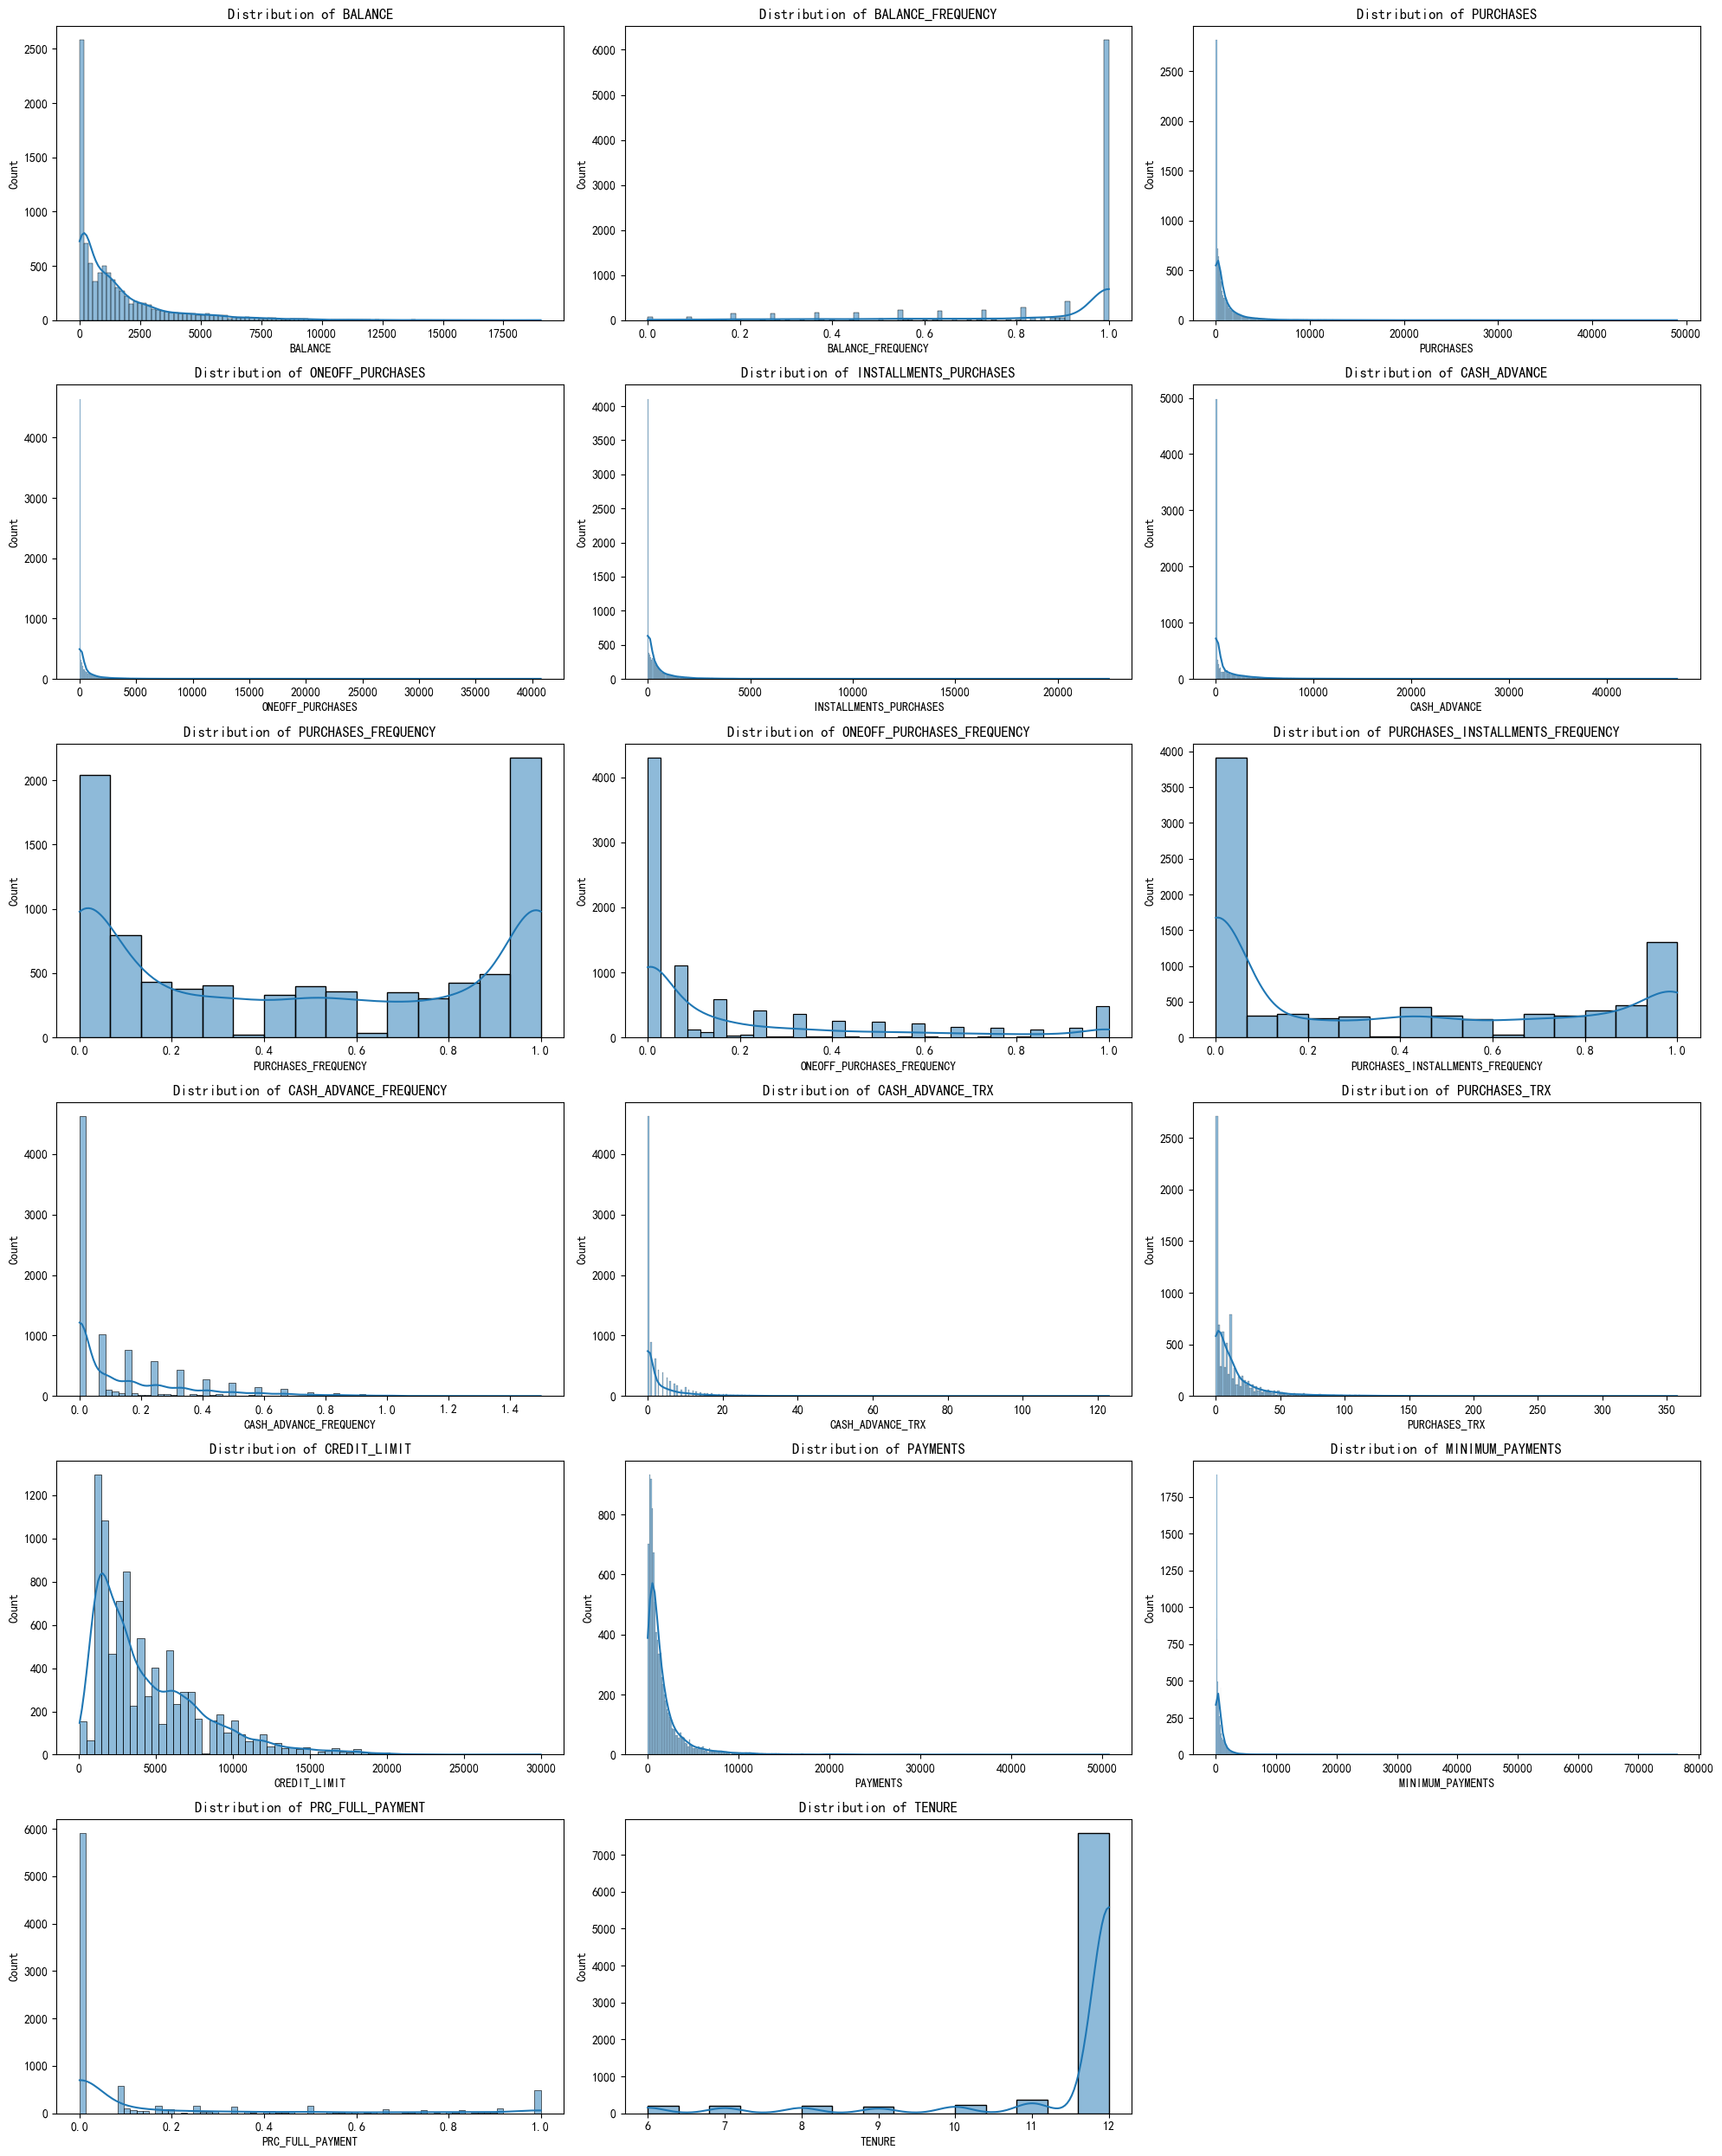

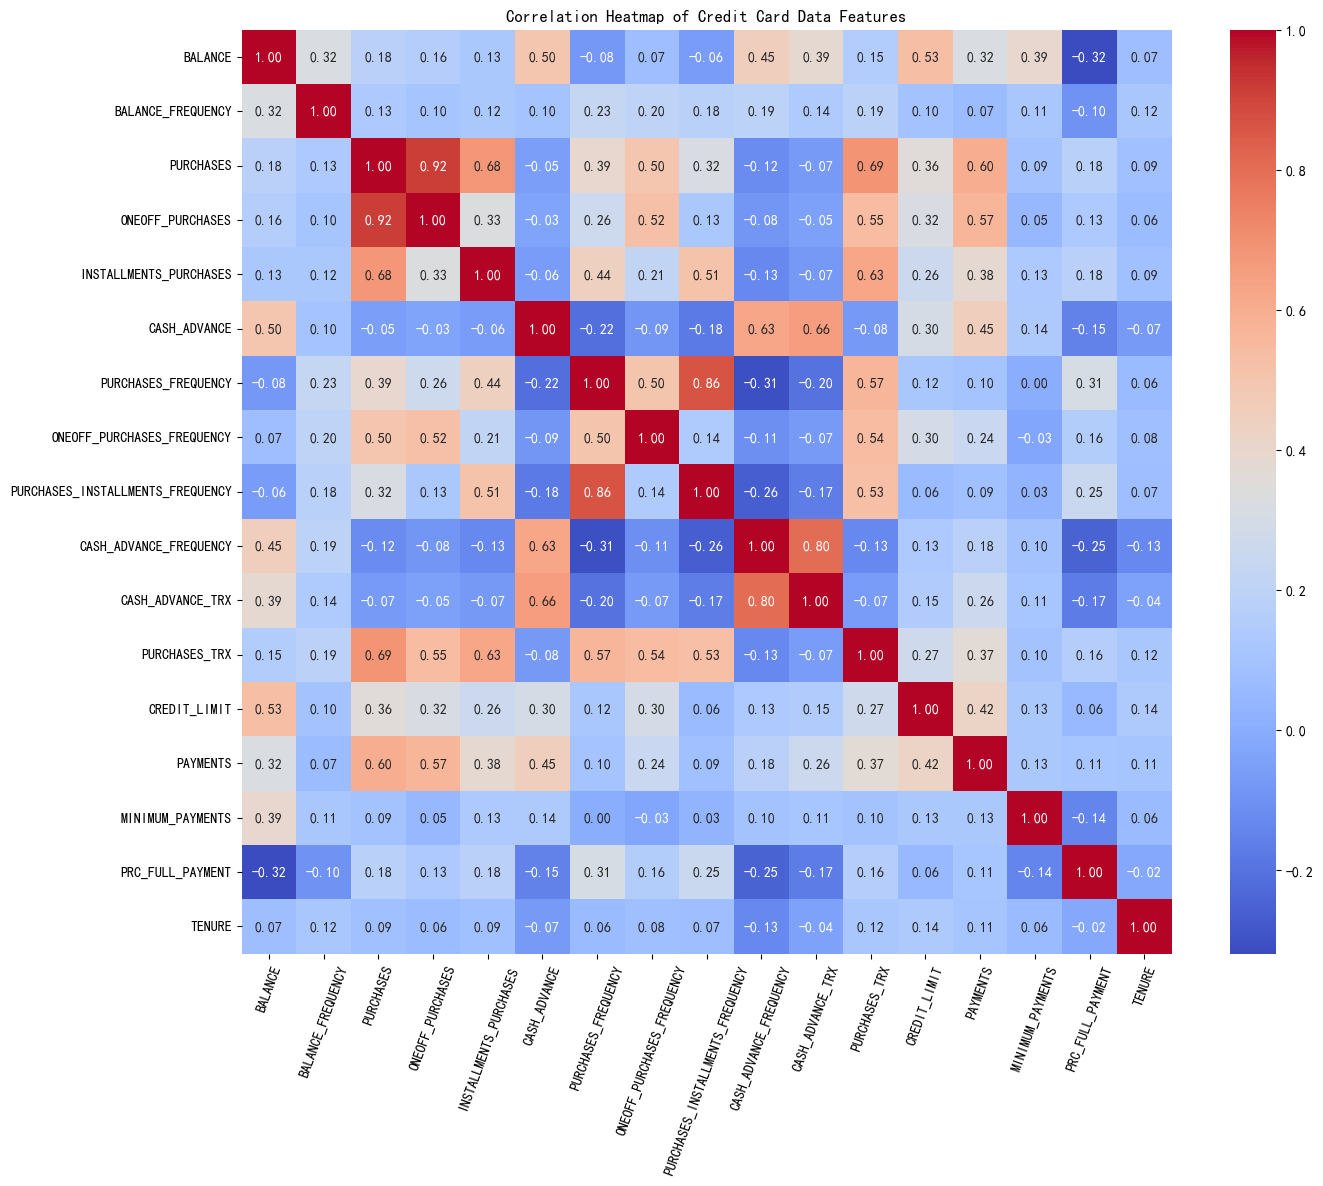

In [42]:
# 3. Exploratory Data Analysis (EDA)

# Plot the distribution of all numerical features to understand data distribution
plt.figure(figsize=(20, 25))
# Get the column names of all numerical features
numeric_features = data.select_dtypes(include=[np.number]).columns

# Iterate over each numerical feature and plot its distribution
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features) // 3 + 1, 3, i)  # Dynamically adjust subplot layout
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Plot a heatmap of feature correlations to identify relationships between variables
plt.figure(figsize=(15, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.xticks(rotation=70)
plt.title("Correlation Heatmap of Credit Card Data Features")
plt.show()

In the Exploratory Data Analysis (EDA), by plotting the distribution of each numerical feature and the correlation heatmap, we can identify some customer behavior patterns that are helpful for clustering. Firstly, most numerical features such as `BALANCE`, `PURCHASES` (total purchase amount), `ONEOFF_PURCHASES` (one-off purchase amount), `INSTALLMENTS_PURCHASES` (installment purchase amount), and `CASH_ADVANCE` (cash advance amount) exhibit a noticeable right-skewed distribution. This indicates that the majority of customers concentrate their spending and borrowing at lower levels, while only a few customers engage in high-value transactions, suggesting an imbalance in spending and borrowing habits among the customer base. Additionally, frequency-related features like `PURCHASES_FREQUENCY` (purchase frequency) show a bimodal distribution, indicating a polarization in spending habits, with some customers making frequent purchases while others rarely do so. Similarly, features such as `CASH_ADVANCE_FREQUENCY` and `PURCHASES_TRX` (number of purchase transactions) also exhibit extreme right skewness, revealing that most customers have low transaction frequency and count, while a few display much higher activity. This differentiation may help distinguish high-frequency and low-frequency customers in clustering analysis.

The correlation heatmap further reveals relationships between features. For example, there is a strong positive correlation (0.53) between `BALANCE` and `CREDIT_LIMIT`, indicating that higher credit limits are often accompanied by higher balances. The high correlation (0.69) between `PURCHASES` and `PURCHASES_TRX` suggests that customers with higher spending amounts generally have a greater number of transactions. Likewise, the strong correlation (0.80) between `CASH_ADVANCE_FREQUENCY` and `CASH_ADVANCE_TRX` shows that customers who frequently use cash advances tend to have more cash advance transactions. Additionally, `PRC_FULL_PAYMENT` (percentage of full payments) shows low correlation with other features, indicating that the behavior of full payment is relatively independent in terms of financial habits and could serve as a distinguishing feature for financial status. Overall, the distributions and relationships among these features reveal significant differences in customer spending amounts, frequency, payment behavior, and credit limits. These distinct characteristics provide valuable insights for subsequent clustering analysis, aiding in further customer segmentation to support personalized marketing strategies.


# Clustering Algorithm

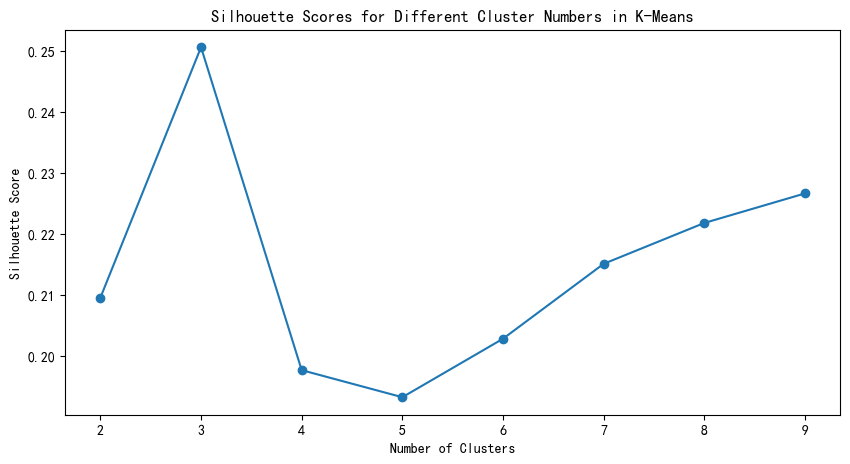

In [43]:
# 4. Clustering Algorithm Implementation
# 1. K-Means Clustering
# Determine the optimal number of clusters using silhouette score and elbow method
kmeans_scores = []
kmeans_range = range(2, 10)

for k in kmeans_range:
    kmeans = KMeans(n_clusters=k, random_state=123, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    kmeans_scores.append(score)

# Plot silhouette scores for different numbers of clusters in K-Means
plt.figure(figsize=(10, 5))
plt.plot(kmeans_range, kmeans_scores, marker='o')
plt.title("Silhouette Scores for Different Cluster Numbers in K-Means")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Determine the optimal number of clusters
optimal_kmeans = KMeans(n_clusters=3, random_state=123, n_init=10)
data['KMeans_Cluster'] = optimal_kmeans.fit_predict(data_scaled)

The silhouette score peaks at 3 clusters.

Given that it produces the highest silhouette score, which indicates clearly delineated clusters, the graph indicates that three clusters are probably ideal. The score shows weaker cluster separation and cohesion with more clusters after three clusters, and it only progressively improves after that.

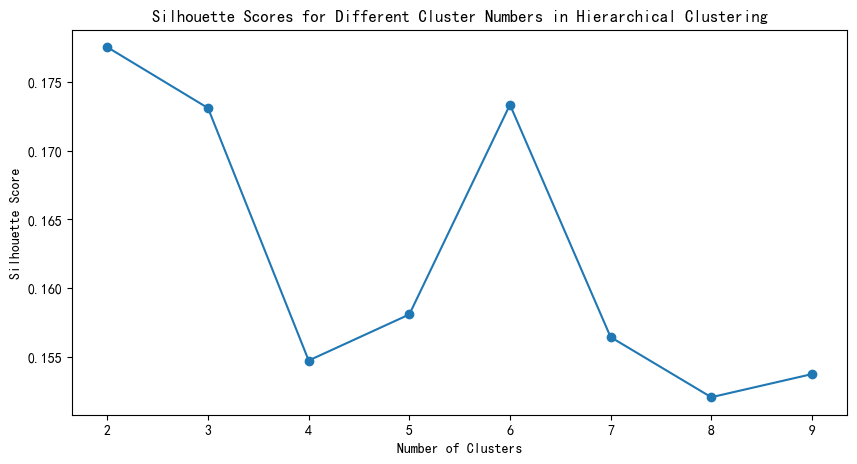

In [44]:
# 2. Hierarchical Clustering
# Determine the optimal number of clusters using silhouette score
agg_scores = []
agg_range = range(2, 10)

for k in agg_range:
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    labels = agg_clustering.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    agg_scores.append(score)

# Plot silhouette scores for different numbers of clusters in hierarchical clustering
plt.figure(figsize=(10, 5))
plt.plot(agg_range, agg_scores, marker='o')
plt.title("Silhouette Scores for Different Cluster Numbers in Hierarchical Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Determine the optimal number of clusters
optimal_agg = AgglomerativeClustering(n_clusters=2)
data['Agglomerative_Cluster'] = optimal_agg.fit_predict(data_scaled)

According to the graph, six clusters have the greatest silhouette scores in hierarchical clustering, which suggests that they may be the best at capturing the data structure. In comparison to six clusters, scores drastically decline with additional cluster counts, indicating less cohesiveness and separation.

Although 6 clusters show the highest score, a smaller number of clusters (e.g., 2) might be more meaningful depending on the data structure.

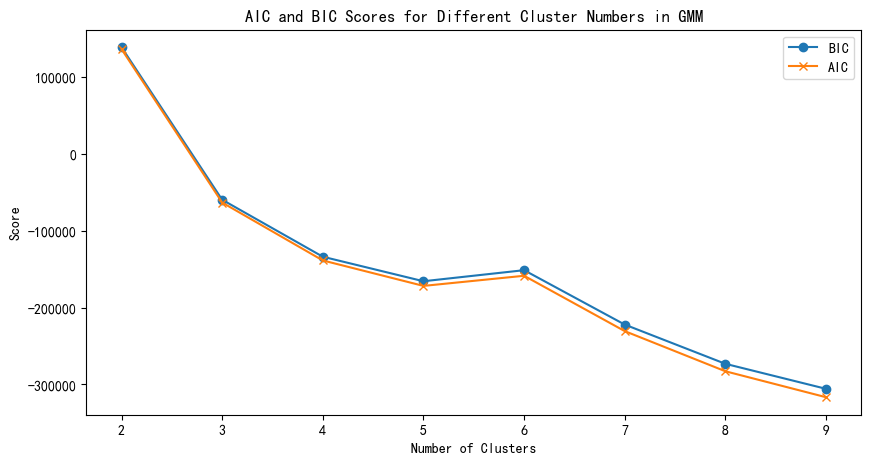

In [45]:
# 3. GMM Clustering
# Use AIC/BIC to determine the optimal number of clusters
gmm_bic_scores = []
gmm_aic_scores = []
gmm_range = range(2, 10)

for k in gmm_range:
    gmm = GaussianMixture(n_components=k, random_state=123)
    gmm.fit(data_scaled)
    gmm_bic_scores.append(gmm.bic(data_scaled))  # Calculate BIC
    gmm_aic_scores.append(gmm.aic(data_scaled))  # Calculate AIC

# Plot AIC and BIC scores for different numbers of clusters in GMM
plt.figure(figsize=(10, 5))
plt.plot(gmm_range, gmm_bic_scores, marker='o', label='BIC')
plt.plot(gmm_range, gmm_aic_scores, marker='x', label='AIC')
plt.title("AIC and BIC Scores for Different Cluster Numbers in GMM")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.show()

# Use the optimal number of clusters
optimal_gmm = GaussianMixture(n_components=2, random_state=123)
data['GMM_Cluster'] = optimal_gmm.fit_predict(data_scaled)

As the number of clusters rises, the graph demonstrates that both AIC and BIC scores fall, suggesting that a model with more clusters fits better. However, the increase flattens out after five clusters, indicating that the model's performance may deteriorate as more clusters are added. Therefore, in this Gaussian Mixture Model (GMM) clustering, five clusters can appropriately compromise model complexity and fit quality.

In [46]:
# Results Display
# Show cluster labels for each clustering method
print("K-Means Cluster Label Distribution:\n", data['KMeans_Cluster'].value_counts())
print("Agglomerative Cluster Label Distribution:\n", data['Agglomerative_Cluster'].value_counts())
print("GMM Cluster Label Distribution:\n", data['GMM_Cluster'].value_counts())

K-Means Cluster Label Distribution:
 KMeans_Cluster
1    6119
0    1596
2    1235
Name: count, dtype: int64
Agglomerative Cluster Label Distribution:
 Agglomerative_Cluster
0    5532
1    3418
Name: count, dtype: int64
GMM Cluster Label Distribution:
 GMM_Cluster
0    5923
1    3027
Name: count, dtype: int64


Agglomerative and GMM created two clusters with a more balanced distribution, whereas K-Means produced three clusters with a dominant group. This suggests that the data may naturally divide into two major groups with minor differences between clustering techniques.

By comparing the performance metrics and cluster label distributions of the three clustering algorithms, we can evaluate each method and choose the most suitable one. For K-Means, based on the silhouette score plot, the highest silhouette score is achieved with 3 clusters, reaching approximately 0.25, indicating that 3 clusters provide the best result. The specific label distribution shows that, among the 3 clusters, the first cluster contains 6,119 customers, while the second and third clusters contain 1,596 and 1,235 customers, respectively. K-Means typically performs well when data is relatively evenly distributed, but it is sensitive to noise and irregular distributions.

For Hierarchical Clustering, the silhouette score reaches a higher value with 2 clusters, suggesting that 2 clusters may be the optimal choice. The label distribution shows that the first cluster contains 5,532 customers, while the second cluster contains 3,418 customers. Hierarchical clustering excels at handling clusters of different sizes but has high computational complexity on large datasets, making it suitable for smaller datasets.

For the Gaussian Mixture Model (GMM), the AIC and BIC score plots show that as the number of clusters increases, the AIC and BIC scores continue to decrease, though the rate of decrease gradually lessens, suggesting an optimal cluster number of 2 or 3. The label distribution for GMM shows that the two clusters contain 5,923 and 3,027 customers, respectively. GMM is suitable for handling complex data distributions, as it allows each cluster to follow a different Gaussian distribution. However, its effectiveness relies on the data aligning with the assumption of a normal distribution.

Overall, K-Means with 3 clusters achieves a high silhouette score and is computationally efficient, making it well-suited to the characteristics of this dataset. While Hierarchical Clustering and GMM perform adequately with a smaller number of clusters, Hierarchical Clustering is more appropriate for smaller datasets and is sensitive to the number of clusters, and GMM requires specific data distribution assumptions. 

### Choice:
Therefore, K-Means is the optimal clustering algorithm in this analysis, as it achieves the best silhouette score with 3 clusters and provides a reasonable customer distribution, enabling effective customer segmentation.


In [47]:
# Create a DataFrame for standardized data, excluding clustering columns
# Use only the feature column names for standardized data
feature_columns = data.columns[:-3] 

data_scaled_df = pd.DataFrame(data_scaled, columns=feature_columns)

# Add cluster labels to the standardized data
data_scaled_df['KMeans_Cluster'] = data['KMeans_Cluster']
data_scaled_df['Agglomerative_Cluster'] = data['Agglomerative_Cluster']
data_scaled_df['GMM_Cluster'] = data['GMM_Cluster']

# Define a function to interpret each cluster
def interpret_clusters(data, cluster_column):
    # Group data by the cluster column and calculate the mean of each feature
    cluster_summary = data.groupby(cluster_column).mean()
    
    # Print the mean of features for each cluster to observe feature differences across clusters
    print(f"Feature means for {cluster_column} clustering:\n", cluster_summary)
    
    # Identify features with the most significant differences by comparing max and min means
    print("\nMost distinguishing features (maximum mean differences across clusters):")
    for column in cluster_summary.columns:
        max_mean = cluster_summary[column].max()
        min_mean = cluster_summary[column].min()
        if max_mean - min_mean > 1:  # Set a threshold (e.g., 1) to filter the most distinguishing features
            print(f"{column}: Max = {max_mean:.2f}, Min = {min_mean:.2f}, Difference = {max_mean - min_mean:.2f}")

# Use the interpret_clusters function to analyze each clustering
print("K-Means Clustering:")
interpret_clusters(data_scaled_df, 'KMeans_Cluster')

print("\nAgglomerative Clustering:")
interpret_clusters(data_scaled_df, 'Agglomerative_Cluster')

print("\nGMM Clustering:")
interpret_clusters(data_scaled_df, 'GMM_Cluster')

K-Means Clustering:
Feature means for KMeans_Cluster clustering:
                  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
KMeans_Cluster                                                             
0               1.165001           0.340703  -0.289573         -0.207085   
1              -0.367429          -0.177648  -0.232937         -0.204433   
2               0.314944           0.439892   1.528337          1.280514   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
KMeans_Cluster                                                              
0                            -0.304306      1.378599            -0.642984   
1                            -0.175093     -0.309485            -0.062985   
2                             1.260783     -0.248182             1.143003   

                ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
KMeans_Cluster                                                                 
0      

_______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Cluster Interpretation
In the results of the three clustering algorithms, each cluster reveals distinct customer characteristics. For K-Means clustering, the three cluster labels represent customers with varying spending and borrowing behaviors. The first cluster (label 0) has high means for `CASH_ADVANCE` and `CASH_ADVANCE_FREQUENCY`, indicating that these customers frequently use cash advances and may have higher-risk spending habits. The second cluster (label 1) shows low average values across spending and borrowing features, suggesting these customers likely have lower spending and borrowing frequencies, focusing on economy and stability. The third cluster (label 2) has higher averages in `PURCHASES` and `ONEOFF_PURCHASES_FREQUENCY`, representing customers who are more active in one-off high-value purchases and installments, likely a high-spending group. Distinctive features include `BALANCE`, `PURCHASES`, and `CASH_ADVANCE`, reflecting differences in customers’ spending and borrowing behaviors.

In Hierarchical Clustering, the two clusters exhibit different spending patterns. The first cluster (label 0) has lower feature means, indicating that these customers generally have lower spending and borrowing frequencies. The second cluster (label 1) has higher means for `PURCHASES_FREQUENCY`, `ONEOFF_PURCHASES_FREQUENCY`, and `PURCHASES_TRX`, representing customers with frequent purchasing behaviors. Notable distinguishing features include `PURCHASES_FREQUENCY`, `ONEOFF_PURCHASES_FREQUENCY`, and `PURCHASES_INSTALLMENTS_FREQUENCY`, highlighting differences in spending frequency and type among customer groups.

For the Gaussian Mixture Model (GMM), the two clusters also show differences in spending frequency and spending amounts. The first cluster (label 0) has lower means for `PURCHASES_FREQUENCY` and `PURCHASES_TRX`, suggesting these customers have lower spending frequencies, possibly representing a conservative spending group. The second cluster (label 1) shows higher averages in `ONEOFF_PURCHASES_FREQUENCY` and `PURCHASES_INSTALLMENTS_FREQUENCY`, indicating a more active spending pattern. These features effectively differentiate between low-frequency and high-frequency spending customer groups, reflecting differences in payment habits.

Overall, significant distinguishing features across the three clustering algorithms include `PURCHASES_FREQUENCY`, `ONEOFF_PURCHASES_FREQUENCY`, and `PURCHASES_TRX`, which help identify differences in customer spending frequency, one-off purchases, and installment purchases.


_______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Actionable Insights

Based on the clustering analysis results, the customer base can be divided into three main groups, with corresponding business strategies tailored for each group. 

1. **High-Spending, High-Frequency Customers:**

For high-frequency and high one-off spending customers, who tend to make large purchases over short periods, high-credit-limit credit card products and flexible installment options are suitable to encourage continued spending. Additionally, loyalty can be increased through reward points or cashback incentives. 

- **Personalized Luxury Offerings:** Banks and financial institutions can offer exclusive access to premium services or luxury rewards. The premium services include travel insurance, breakdown cover, travel lounges, etc. These services can enhance the loyalty of the highly valued customer.

- **Data-Driven Recommendations:** Banks and financial institutions can use predictive analytics to suggest personalized product or service recommendations to their customers. For example, if a customer frequently spends on travel, these financial institutions can partner with popular hotel chains and airlines to provide exclusive discounts.

- **Upselling Opportunities:** Banks and financial institutions can consider offering these customers premium versions of existing products. For example, High-value clients may be able to obtain specialized loan products from banks and other financial institutions with advantageous terms, like reduced interest rates or adjustable mortgage or personal loan repayment schedules. 


2. **Low-Frequency, Low-Spending Customers:**

For the conservative low-frequency and low-spending customers who prioritize economy and spending moderation, basic credit limit cards with benefits such as no annual fees and low interest rates are appropriate to encourage a moderate increase in spending frequency. Furthermore, interest-free installment promotions could be introduced to gradually develop their spending habits. 

- **Educational Campaigns on Financial Products:** Banks and financial institutions can run various financial awareness programs that educate customers about financial literacy. The banks will be in an advantageous position if the customers become financially literate and start utilizing credit wisely. 

- **Progressive Loyalty Programs:** Banks and financial institutions can implement a rewards program that provides incentives for increased usage, like a point system that, when it reaches a certain point, provides cashback or some discounts.

- **Seasonal or Targeted Promotions:** Banks and financial institutions can offer special low-interest or zero-interest introductory rates on select purchases during holidays or festivals, providing low-frequency customers a low-risk opportunity to experience credit benefits.



3. **Cash Advance-Oriented Customers:**

For customers who frequently use cash advances, displaying a high borrowing demand and possibly a higher risk preference, a higher credit limit, and exclusive cash advance services are suitable, though credit risk monitoring should be strengthened. For this group, flexible repayment plans and short-term high-interest loan products can meet their cash flow needs, while regular credit risk evaluations ensure business security. 

- **Financial Counseling Services:** Cash advance customers may benefit from personalized financial counseling to help them manage cash flow effectively, which reduces potential risks and strengthens customer loyalty.

- **Cash Flow Management Tools:** Banks and financial institutions can introduce mobile app features that help customers manage their budget and track their cash advances, showing repayment deadlines and total interest over time.

- **Enhanced Fraud Protection:** Banks and financial institutions can implement various fraud protection services like real-time alerts and multi-factor authentication to reassure these customers and help mitigate potential risks to the bank.

By further understanding the needs and priority of each segment, banks and financial institutions can enhance customer engagement, improve customer satisfaction, and improve the profitability of each customer segment.